In [1]:
# Cell 1 — Setup imports & path
import sys, os
from pathlib import Path

# ensure src/ is on PYTHONPATH
PROJECT_ROOT = Path('..').resolve()
SRC_PATH = PROJECT_ROOT / 'src'
sys.path.append(str(SRC_PATH))

import glob
import numpy as np
import matplotlib.pyplot as plt

# utils and env/model
from utils import load_image, load_mask, compute_vector_field, visualize_vector_field
from engine import AntEnv


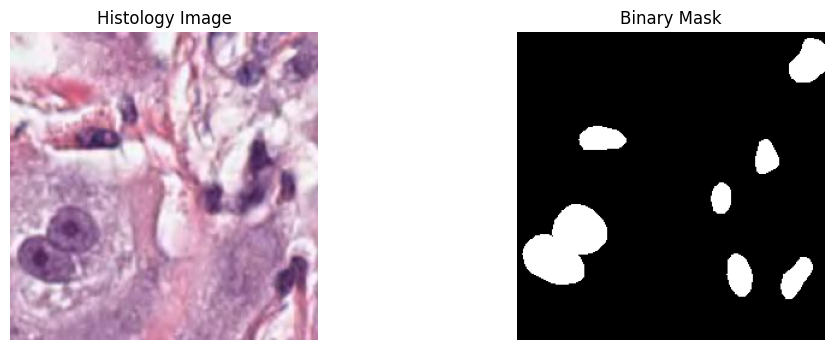

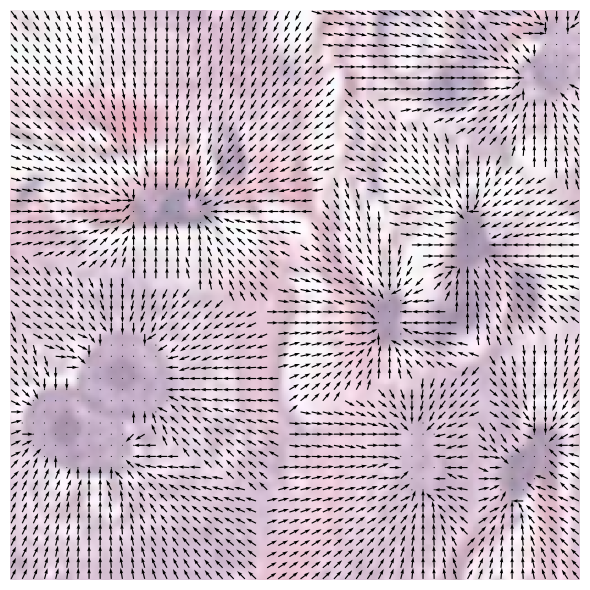

In [2]:
# Cell 2 — load sample image/mask

image_index = 1
img_path = f'/Users/jeremiasz/Desktop/AntNet/data/Fold1_jpg/images/{image_index}.jpg'
mask_path  = f'/Users/jeremiasz/Desktop/AntNet/data/Fold1_jpg/masks/{image_index}.jpg'


# load
img  = load_image(img_path)
mask = load_mask(mask_path)

# compute vector field
vf = compute_vector_field(mask)

# show image, mask, VF overlay
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.title('Histology Image')
plt.imshow(img); plt.axis('off')
plt.subplot(1,2,2); plt.title('Binary Mask')
plt.imshow(mask, cmap='gray'); plt.axis('off')

visualize_vector_field(vf, background=img, stride=5, scale=5)


In [3]:
# Cell 3 — create AntEnv
env = AntEnv(
    image=img,
    mask=mask,
    vector_field=vf,
    kernel_size=(16,16),
    memory_len=100,
    max_steps=20000
)

# reset and inspect initial observation
(obs_patch, mem) = env.reset()
print("Initial pos:", env.pos)
print("Patch shape:", obs_patch.shape)
print("Memory length:", len(mem))


Initial pos: (39, 247)
Patch shape: (16, 16, 3)
Memory length: 0


In [4]:
# Cell 4 — step randomly for up to 200 steps
num_steps = 20000
rewards = []

for i in range(num_steps):
    action = np.random.randint(0, 8)
    (obs_patch, mem), reward, done, info = env.step(action)
    rewards.append(reward)
    if done:
        break

print(f"Completed {len(rewards)} steps, final pos={info['position']}")


Completed 20000 steps, final pos=(np.int64(1), np.int64(205))


Text(0.5, 1.0, 'Random‐walk Trajectory')

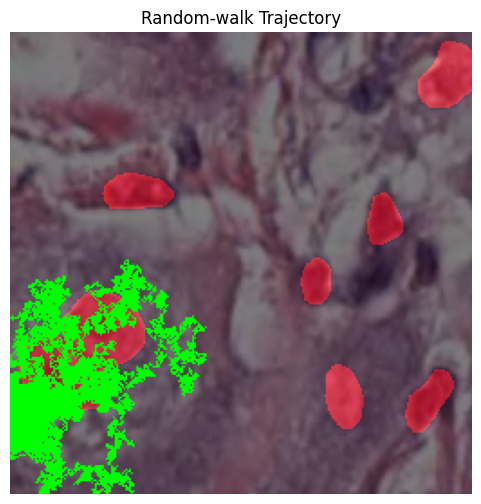

In [5]:
# Cell 5 — show trajectory overlaid on image + mask
canvas = env.render(overlay_mask=True)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.axis('off')
plt.title('Random‐walk Trajectory')
